In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [2]:
url_tsla=r"C:\Users\hemua\Desktop\tesla_price.csv"
tesla=pd.read_csv(url_tsla)

In [3]:
tsla=tesla.copy()
tsla.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$598.78,16584570,$602.17,$611.79,$597.6301
1,06/08/2021,$603.59,26053410,$623.01,$623.09,$595.5
2,06/07/2021,$605.13,22543680,$591.825,$610,$582.88
3,06/04/2021,$599.05,24036900,$579.71,$600.61,$577.2
4,06/03/2021,$572.84,30111890,$601.8,$604.55,$571.22


In [4]:
#To change the column name 
tsla.rename(columns={'Close/Last':'Close'},inplace=True)

In [5]:
#To know whether the data has null values
tsla.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [6]:
#Execute this to know the data type of all columns
tsla.dtypes

Date      object
Close     object
Volume     int64
Open      object
High      object
Low       object
dtype: object

In [7]:
#From above output you will find that the datatype of ('Close','Open','High','Low') price as object, because the column
                    #value has dollor symbol. so, we have to remove that symbol and change the data type as float.
cols=['Close','Open','High','Low']
for i in cols:
    tsla[i]=tsla[i].str.replace('$','').astype(float)


In [8]:
tsla.dtypes

Date       object
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [9]:
#we have to convert the date datatype from object to datetime
tsla['Date'] = pd.to_datetime(tsla['Date'], format="%m/%d/%y",infer_datetime_format=True)
months= tsla['Date'].dt.month

C:\Users\hemua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Date'>

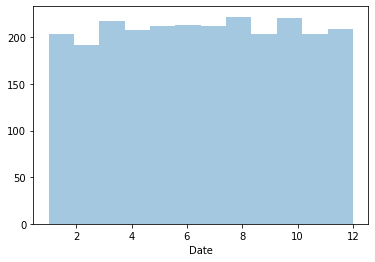

In [10]:
#To confirm that month should be below 12
sns.distplot(months,kde=False,bins =12)

In [11]:
#Date column should be in sorted format and make it as index
tsla.sort_values(by="Date",ignore_index=True,inplace=True)
tsla=tsla.set_index("Date")
tsla.head()

,Close,Volume,Open,High,Low
Date,,,,,
2011-06-10,5.572,7832660,5.504,5.6598,5.470
2011-06-13,5.686,8566960,5.614,5.7760,5.576
2011-06-14,5.720,7866000,5.708,5.9400,5.704
2011-06-15,5.464,6723390,5.688,5.6900,5.414
2011-06-16,5.300,9210620,5.534,5.6000,5.148


# visualization plot

Text(0, 0.5, 'close price')

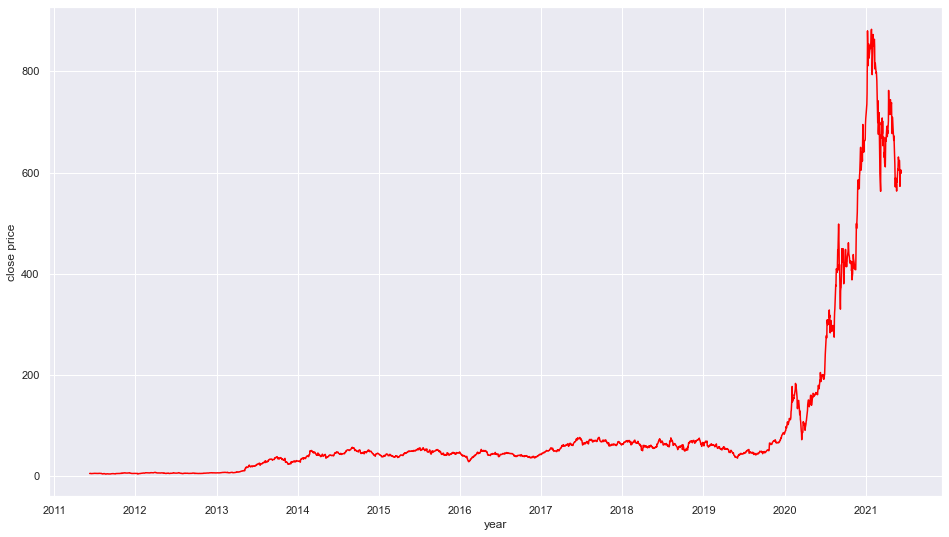

In [12]:
plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
sns.lineplot(data=tsla,x='Date',y='Close',color = 'red')
plt.xlabel("year")
plt.ylabel("close price")

array([[<AxesSubplot:xlabel='Close', ylabel='Close'>,
        <AxesSubplot:xlabel='Volume', ylabel='Close'>,
        <AxesSubplot:xlabel='Open', ylabel='Close'>,
        <AxesSubplot:xlabel='High', ylabel='Close'>,
        <AxesSubplot:xlabel='Low', ylabel='Close'>],
       [<AxesSubplot:xlabel='Close', ylabel='Volume'>,
        <AxesSubplot:xlabel='Volume', ylabel='Volume'>,
        <AxesSubplot:xlabel='Open', ylabel='Volume'>,
        <AxesSubplot:xlabel='High', ylabel='Volume'>,
        <AxesSubplot:xlabel='Low', ylabel='Volume'>],
       [<AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>],
       [<AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>,
        <AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', y

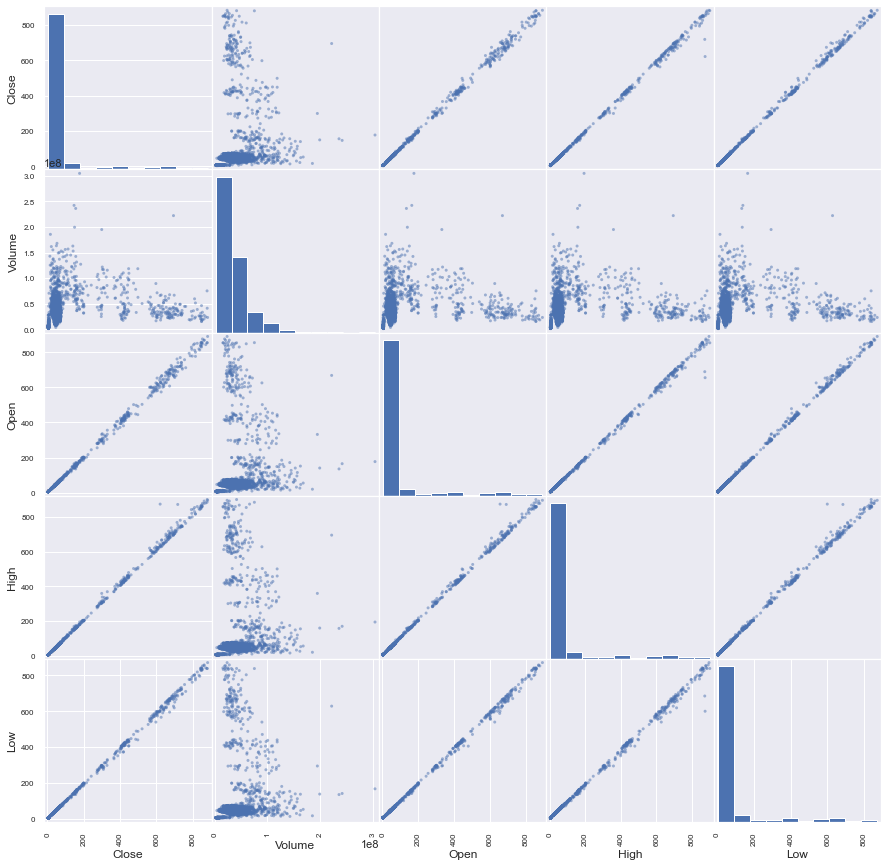

In [13]:
#plotting correlation
pd.plotting.scatter_matrix(tsla, figsize = (15, 15))


In [14]:
#Execute this to know the daily returns
tsla['day_returns']=tsla['Close'].pct_change()*100
tsla.head()

,Close,Volume,Open,High,Low,day_returns
Date,,,,,,
2011-06-10,5.572,7832660,5.504,5.6598,5.470,NaN
2011-06-13,5.686,8566960,5.614,5.7760,5.576,2.045944
2011-06-14,5.720,7866000,5.708,5.9400,5.704,0.597960
2011-06-15,5.464,6723390,5.688,5.6900,5.414,-4.475524
2011-06-16,5.300,9210620,5.534,5.6000,5.148,-3.001464


In [15]:
tsla.dropna(inplace=True)
tsla.head()

,Close,Volume,Open,High,Low,day_returns
Date,,,,,,
2011-06-13,5.686,8566960,5.614,5.776,5.576,2.045944
2011-06-14,5.720,7866000,5.708,5.940,5.704,0.597960
2011-06-15,5.464,6723390,5.688,5.690,5.414,-4.475524
2011-06-16,5.300,9210620,5.534,5.600,5.148,-3.001464
2011-06-17,5.300,8568325,5.374,5.540,5.228,0.000000


<AxesSubplot:xlabel='Date'>

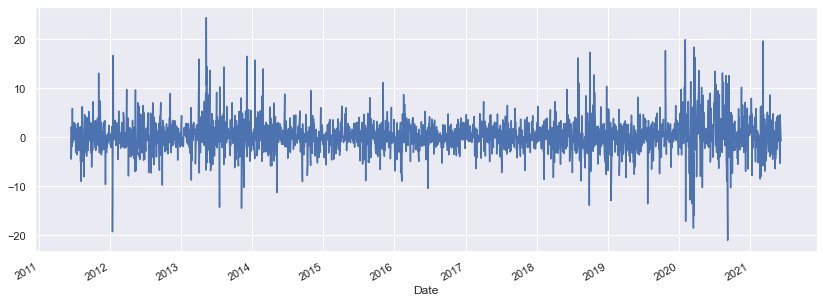

In [16]:
#Representing daily returns in form of a plot
tsla['day_returns'].plot(figsize=(14,5))

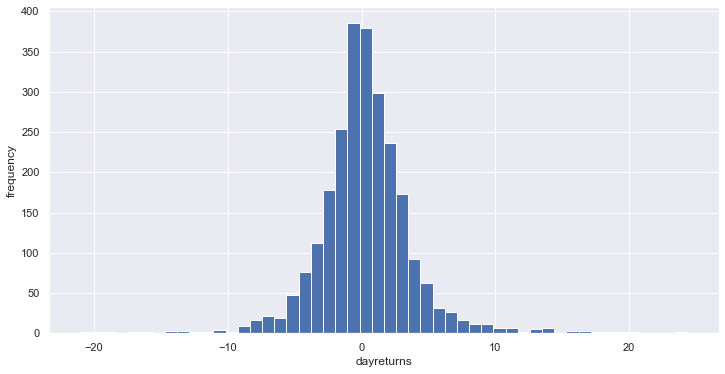

In [17]:
#Plotting daily returns distribution histogram 
tsla['day_returns'].hist(bins=50,figsize=(12,6))
plt.xlabel("dayreturns")
plt.ylabel("frequency")
plt.show()

<AxesSubplot:xlabel='day_returns'>

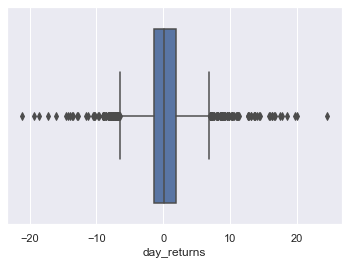

In [18]:
sns.boxplot(x = 'day_returns', data = tsla)

In [19]:
#From the output of this code you will see the average percentage of daily returns
tsla['day_returns'].describe()

count    2515.000000
mean        0.247641
std         3.520712
min       -21.062823
25%        -1.474181
50%         0.111276
75%         1.899706
max        24.402857
Name: day_returns, dtype: float64

In [20]:
#we have to add a new column ‘Trend’ whose values are based on the daily percentage returns we calculated above
def trend(x):
    if x > -1 and x <= 1:
        return "Negligible or No change"
    elif x > 1 and x <= 1.5:
        return 'Slight Positive'
    elif x > -1.5 and x <= -1:
        return 'Slight Negative'
    elif x > 1.5 and x <= 5:
        return 'Positive'
    elif x > -5 and x <= -1.5:
        return 'Negative'
    elif x > 5 and x <= 8:
        return 'Among top gainers'
    elif x > -8 and x <= -5:
        return 'Among top losers'
    elif x > 8:
        return 'Bull run'
    elif x <= -8:
        return 'Bear drop'

tsla['Trend']= tsla['day_returns'].apply(lambda x:trend(x))
tsla.head()

,Close,Volume,Open,High,Low,day_returns,Trend
Date,,,,,,,
2011-06-13,5.686,8566960,5.614,5.776,5.576,2.045944,Positive
2011-06-14,5.720,7866000,5.708,5.940,5.704,0.597960,Negligible or No change
2011-06-15,5.464,6723390,5.688,5.690,5.414,-4.475524,Negative
2011-06-16,5.300,9210620,5.534,5.600,5.148,-3.001464,Negative
2011-06-17,5.300,8568325,5.374,5.540,5.228,0.000000,Negligible or No change


([<matplotlib.patches.Wedge at 0x17b2461a520>,
 [Text(3.280532115588824, 0.35792323002330717, 'Among top gainers'),
  Text(3.1365702562794375, 1.0256349386712345, 'Among top losers'),
  Text(2.961084030440074, 1.4567022223751724, 'Bear drop'),
  Text(2.767799928369618, 1.7970207445984414, 'Bull run'),
  Text(0.9331327274156463, 3.165321991997945, 'Negative'),
  Text(-3.3443812712897305, 0.6124654375934109, 'Negligible or No change'),
  Text(0.14217076988883445, -3.2969360734156217, 'Positive'),
  Text(2.751981135054059, -1.821153434586602, 'Slight Negative'),
  Text(3.236742096210756, -0.6430401251999794, 'Slight Positive')],
 [Text(1.78938115395754, 0.1952308527399857, '3.5%'),
  Text(1.7108565034251473, 0.5594372392752187, '3.1%'),
  Text(1.615136743876404, 0.7945648485682758, '1.4%'),
  Text(1.5097090518379732, 0.9801931334173315, '2.4%'),
  Text(0.5089814876812615, 1.7265392683625151, '20.1%'),
  Text(-1.8689189457207316, 0.34226009747867076, '33.2%'),
  Text(0.07754769266663696, -

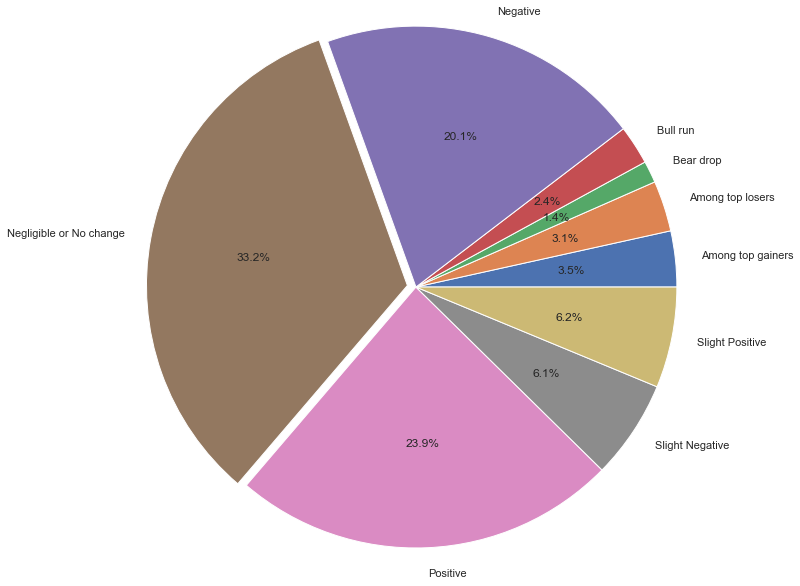

In [21]:
#Visualizing Trend Frequency with Pie-Chart 
pie_data_tsla = tsla.groupby('Trend')
label_list_tsla =sorted([i for i in tsla.loc[:, 'Trend'].unique()])
plt.pie(pie_data_tsla['Trend'].count(), labels = label_list_tsla,autopct = '%1.1f%%', radius = 3,explode = (0,0,0,0,0, 0.1, 0,0,0))

<AxesSubplot:xlabel='Date'>

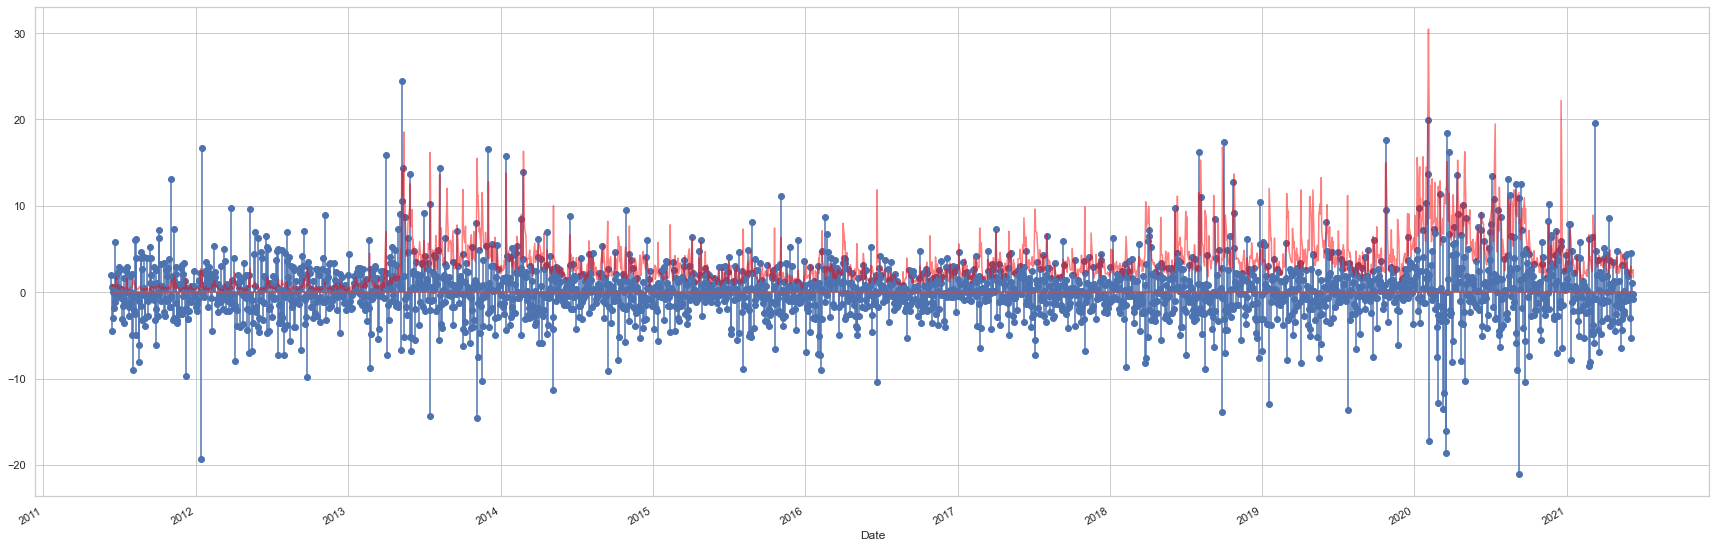

In [22]:
#plot to know the insight between volume and daily returns
sns.set(style="whitegrid")
plt.stem(tsla.index, tsla['day_returns'])
(tsla['Volume']/10000000).plot(figsize = (30, 10),color = 'red', alpha = 0.5)

In [23]:
tsla

,Close,Volume,Open,High,Low,day_returns,Trend
Date,,,,,,,
2011-06-13,5.686,8566960,5.614,5.776,5.5760,2.045944,Positive
2011-06-14,5.720,7866000,5.708,5.940,5.7040,0.597960,Negligible or No change
2011-06-15,5.464,6723390,5.688,5.690,5.4140,-4.475524,Negative
2011-06-16,5.300,9210620,5.534,5.600,5.1480,-3.001464,Negative
2011-06-17,5.300,8568325,5.374,5.540,5.2280,0.000000,Negligible or No change
...,...,...,...,...,...,...,...
2021-06-03,572.840,30111890,601.800,604.550,571.2200,-5.334479,Among top losers
2021-06-04,599.050,24036900,579.710,600.610,577.2000,4.575449,Positive
2021-06-07,605.130,22543680,591.825,610.000,582.8800,1.014940,Slight Positive


In [24]:
tsl=tsla[['Close']].copy()

In [25]:
target=30
tsl['prediction']=tsl[['Close']].shift(-target)
tsl.tail(30)

,Close,prediction
Date,,
2021-04-28,694.40,NaN
2021-04-29,677.00,NaN
2021-04-30,709.44,NaN
2021-05-03,684.90,NaN
2021-05-04,673.60,NaN
2021-05-05,670.94,NaN
2021-05-06,663.54,NaN
2021-05-07,672.37,NaN
2021-05-10,629.04,NaN


In [26]:
X=np.array(tsl.drop(['prediction'],1))[:-target]
print(X)

[[  5.686]
 [  5.72 ]
 [  5.464]
 ...
 [729.4  ]
 [738.2  ]
 [704.74 ]]


In [27]:
y=np.array(tsl['prediction'])[:-target]
y

array([  5.6  ,   5.528,   5.634, ..., 605.13 , 603.59 , 598.78 ])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0,shuffle=False)

# Linear regression

In [29]:
lr=LinearRegression().fit(x_train,y_train)

In [30]:
x_target=tsl.drop(['prediction'],1)[:-target]
x_target=x_target.tail(target)
x_target=np.array(x_target)
x_target

array([[676.88],
       [701.81],
       [653.16],
       [654.87],
       [670.  ],
       [662.16],
       [630.27],
       [640.39],
       [618.71],
       [611.29],
       [635.62],
       [667.93],
       [661.75],
       [691.05],
       [691.62],
       [670.97],
       [683.8 ],
       [677.02],
       [701.98],
       [762.32],
       [732.23],
       [738.85],
       [739.78],
       [714.63],
       [718.99],
       [744.12],
       [719.69],
       [729.4 ],
       [738.2 ],
       [704.74]])

In [31]:
lr_prediction=lr.predict(x_target)
print(lr_prediction)

[639.66423622 663.11792033 617.34889779 618.95763424 633.19165914
 625.81593176 595.81440804 605.33511735 584.93897329 577.95837417
 600.84758935 631.24424132 625.43021132 652.99511082 653.53135631
 634.10421724 646.17444457 639.79594564 663.2778532  720.0446121
 691.73649517 697.96446905 698.8393959  675.17873984 679.28054741
 702.92238784 679.9390945  689.07408338 697.35296104 665.87441028]


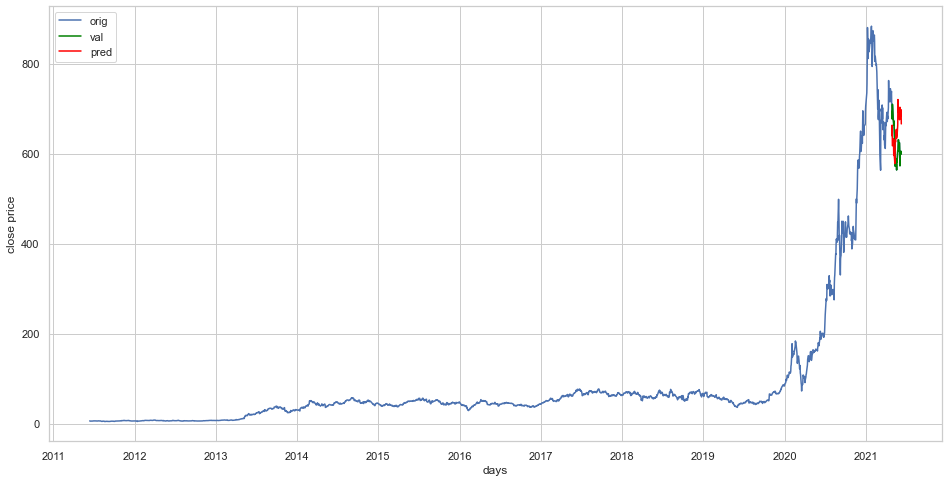

In [32]:
predictions=lr_prediction
valid=tsl[X.shape[0]:].copy()
valid['prediction']=predictions
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("close price")
plt.plot(tsl['Close'])
plt.plot(valid['Close'],color='green')
plt.plot(valid['prediction'],color='red')
plt.legend(['orig','val','pred'])
plt.show()

In [33]:
valid['Close']=valid['Close'].pct_change()*100
valid['prediction']=valid['prediction'].pct_change()*100

In [34]:
y_act=np.where(valid['Close']>0,1,0)
y_pred=np.where(valid['prediction']>0,1,0)

In [35]:
y_act

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0])

In [36]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0])

In [37]:
print(classification_report(y_act,y_pred))


              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30



In [38]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_act,y_pred)
accuracy

0.5

# Decision tree regressor

In [39]:
tree=DecisionTreeRegressor().fit(x_train,y_train)

In [40]:
tree_prediction=tree.predict(x_target)
print(tree_prediction)

[64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016
 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016
 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016 64.016]


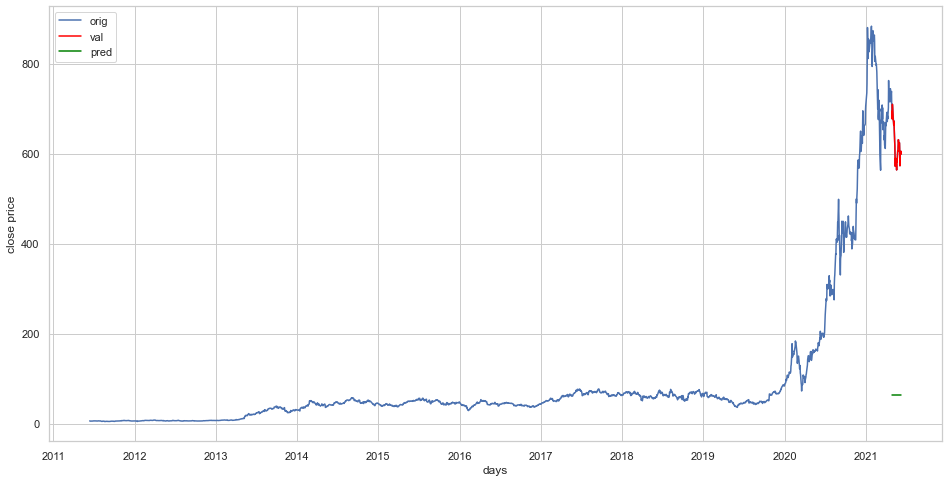

In [41]:
predictions=tree_prediction
valid=tsl[X.shape[0]:].copy()
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("close price")
plt.plot(tsl['Close'])
plt.plot(valid['Close'],color='red')
plt.plot(valid['predictions'],color='green')
plt.legend(['orig','val','pred'])
plt.show()

In [42]:
tsl[X.shape[0]:]

,Close,prediction
Date,,
2021-04-28,694.40,NaN
2021-04-29,677.00,NaN
2021-04-30,709.44,NaN
2021-05-03,684.90,NaN
2021-05-04,673.60,NaN
2021-05-05,670.94,NaN
2021-05-06,663.54,NaN
2021-05-07,672.37,NaN
2021-05-10,629.04,NaN


# support vector regressor

In [43]:
lin_svr=SVR(kernel='linear',C=1000.0)
lin_svr.fit(x_train,y_train)

rbf_svr=SVR(kernel='rbf',C=1000.0,gamma=0.15)
rbf_svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.15)

In [44]:
lin_svr_prediction=lin_svr.predict(x_target)

rbf_svr_prediction=rbf_svr.predict(x_target)

In [45]:
lin_svr_prediction

array([659.8254042 , 684.09785506, 636.73103703, 638.39593663,
       653.12686929, 645.49365451, 614.44478568, 624.29785755,
       603.18968924, 595.96539674, 619.65367164, 651.11146624,
       645.09446964, 673.62165859, 674.17662265, 654.07128669,
       666.56288471, 659.96171208, 684.26336437, 743.01185032,
       713.715493  , 720.16089105, 721.06635732, 696.57971648,
       700.82471282, 725.29188722, 701.50624634, 710.96014041,
       719.52802927, 686.95056851])

In [46]:
rbf_svr_prediction

array([41.07749134, 41.07749134, 41.07749134, 41.07749134, 41.07749134,
       41.07749134, 41.07749134, 41.07749134, 41.07749134, 41.07749134,
       41.07749134, 41.07749134, 41.07749134, 41.07749134, 41.07749134,
       41.07749134, 41.07749134, 41.07749134, 41.07749134, 41.07749134,
       41.07749134, 41.07749134, 41.07749134, 41.07749134, 41.07749134,
       41.07749134, 41.07749134, 41.07749134, 41.07749134, 41.07749134])

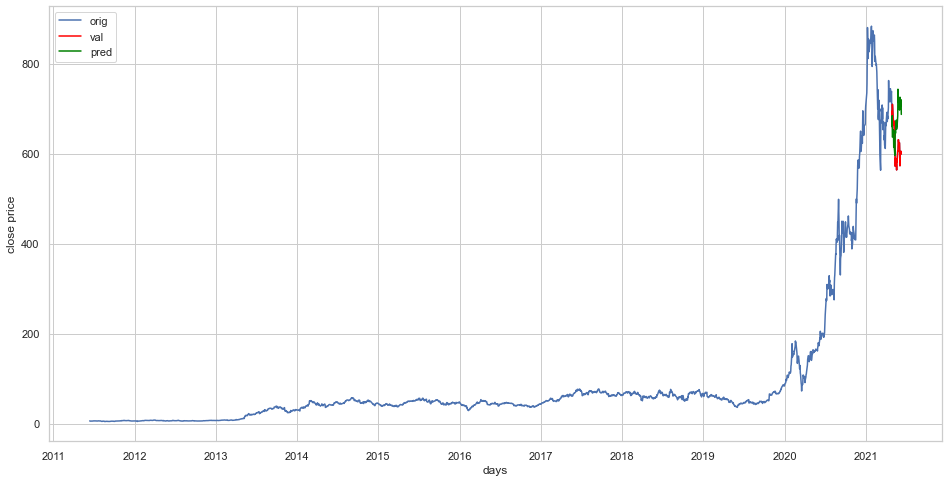

In [47]:
lin_predictions=lin_svr_prediction
valid=tsl[X.shape[0]:].copy()
valid['prediction']=lin_predictions
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("close price")
plt.plot(tsl['Close'])
plt.plot(valid['Close'],color='red')
plt.plot(valid['prediction'],color='green')
plt.legend(['orig','val','pred'])
plt.show()

In [48]:
valid['Close']=valid['Close'].pct_change()*100
valid['prediction']=valid['prediction'].pct_change()*100

In [49]:
y_act=np.where(valid['Close']>0,1,0)
y_pred=np.where(valid['prediction']>0,1,0)

In [50]:
y_act

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0])

In [51]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0])

In [52]:
print(classification_report(y_act,y_pred))


              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.35      0.60      0.44        10

    accuracy                           0.50        30
   macro avg       0.52      0.53      0.49        30
weighted avg       0.58      0.50      0.51        30



In [53]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_act,y_pred)
accuracy

0.5

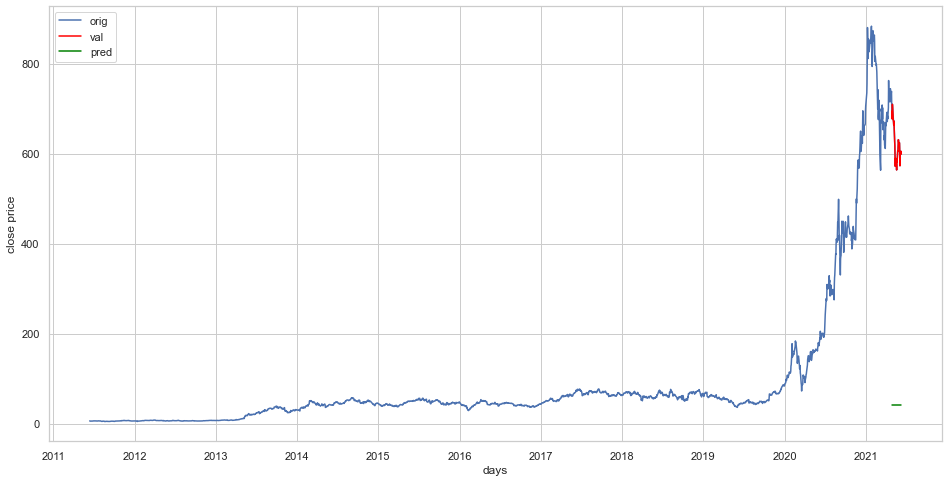

In [54]:
rbf_predictions=rbf_svr_prediction
valid=tsl[X.shape[0]:].copy()
valid['prediction']=rbf_predictions
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("close price")
plt.plot(tsl['Close'])
plt.plot(valid['Close'],color='red')
plt.plot(valid['prediction'],color='green')
plt.legend(['orig','val','pred'])
plt.show()

In [55]:
valid['Close']=valid['Close'].pct_change()*100
valid['prediction']=valid['prediction'].pct_change()*100

In [56]:
y_act=np.where(valid['Close']>0,1,0)
y_pred=np.where(valid['prediction']>0,1,0)

In [57]:
y_act

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0])

In [58]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
print(classification_report(y_act,y_pred))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30



C:\Users\hemua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_act,y_pred)

In [61]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_act,y_pred)
accuracy

0.6666666666666666

# KNN

In [62]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params)

In [63]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_knn = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test_knn = pd.DataFrame(x_test_scaled)
x_target_knn = scaler.fit_transform(x_target)

In [64]:
model.fit(x_train_knn , y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [65]:
model.best_params_

{'n_neighbors': 5}

In [66]:
knn = neighbors.KNeighborsRegressor(5)
knn.fit(x_train_knn,y_train)

KNeighborsRegressor()

In [67]:
x_train_knn

,0
0,0.017849
1,0.018317
2,0.014791
3,0.012533
4,0.012533
...,...
1983,0.584107
1984,0.611899
1985,0.642005
1986,0.642859


In [68]:
x_target_knn

array([[0.43428458],
       [0.59935112],
       [0.27722969],
       [0.28855194],
       [0.38873072],
       [0.3368205 ],
       [0.1256704 ],
       [0.19267695],
       [0.04912931],
       [0.        ],
       [0.16109382],
       [0.37502483],
       [0.33410581],
       [0.528107  ],
       [0.53188108],
       [0.39515328],
       [0.48010329],
       [0.43521155],
       [0.60047673],
       [1.        ],
       [0.80076806],
       [0.84460041],
       [0.85075813],
       [0.68423492],
       [0.71310336],
       [0.87949414],
       [0.7177382 ],
       [0.78203006],
       [0.84029663],
       [0.61875124]])

In [69]:
preds = knn.predict(x_target_knn)

In [70]:
preds

array([38.594  , 46.2164 , 31.45448, 30.8596 , 37.5104 , 36.3744 ,
       20.3904 , 22.92076,  8.0676 ,  5.5236 , 22.0716 , 33.81056,
       36.85472, 45.8856 , 44.7412 , 33.808  , 44.1728 , 33.0956 ,
       43.8508 , 67.4996 , 59.8416 , 66.6752 , 66.6404 , 49.2708 ,
       56.2644 , 66.0312 , 55.1104 , 59.9476 , 64.8464 , 51.2886 ])

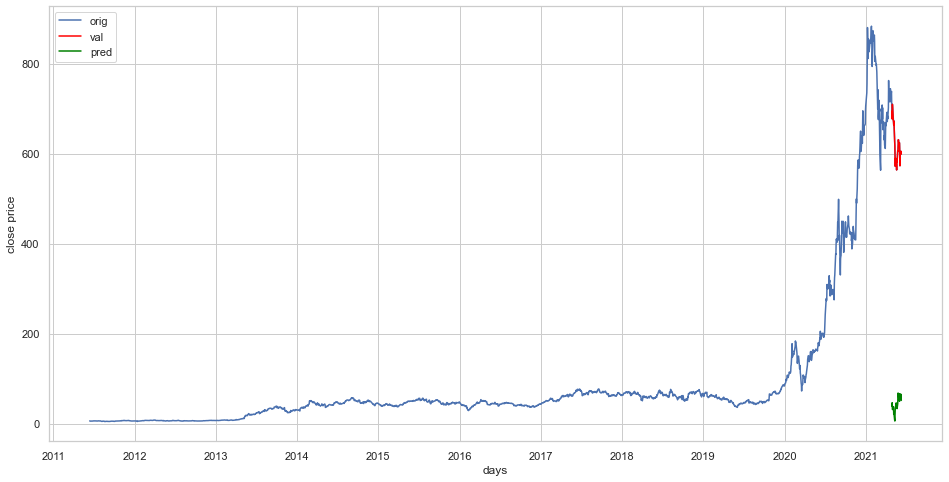

In [71]:
predictions=preds
valid=tsl[X.shape[0]:].copy()
valid['prediction']=predictions
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("close price")
plt.plot(tsl['Close'])
plt.plot(valid['Close'],color='red')
plt.plot(valid['prediction'],color='green')
plt.legend(['orig','val','pred'])
plt.show()

In [72]:
valid['Close']=valid['Close'].pct_change()*100
valid['prediction']=valid['prediction'].pct_change()*100

In [73]:
y_act=np.where(valid['Close']>0,1,0)
y_pred=np.where(valid['prediction']>0,1,0)

In [74]:
y_act

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0])

In [75]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0])

In [76]:
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30



In [77]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_act,y_pred)
accuracy

0.5666666666666667

# Arima

In [78]:
model = auto_arima(x_train, start_p=1, start_q=1,max_p=3, max_q=3, m=1,d=1, trace=True,error_action='ignore',suppress_warnings=True)
#model.fit(x_train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6661.652, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6659.801, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6661.001, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6661.013, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6658.378, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.955 seconds


In [79]:
model.fit(x_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [80]:
model1 = ARIMA(x_train, order=(0,1,0))  
fitted = model1.fit(disp=0)  
#print(fitted.summary())

C:\Users\hemua\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [81]:
preds = model.predict(30)

In [82]:
preds

array([49.412, 49.412, 49.412, 49.412, 49.412, 49.412, 49.412, 49.412,
       49.412, 49.412, 49.412, 49.412, 49.412, 49.412, 49.412, 49.412,
       49.412, 49.412, 49.412, 49.412, 49.412, 49.412, 49.412, 49.412,
       49.412, 49.412, 49.412, 49.412, 49.412, 49.412])

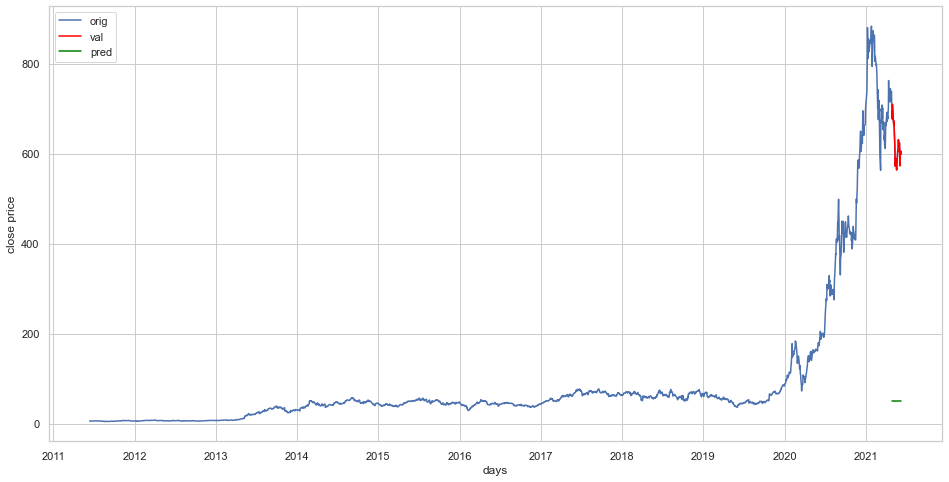

In [83]:
predictions=preds
valid=tsl[X.shape[0]:].copy()
valid['prediction']=predictions
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("close price")
plt.plot(tsl['Close'])
plt.plot(valid['Close'],color='red')
plt.plot(valid['prediction'],color='green')
plt.legend(['orig','val','pred'])
plt.show()

In [84]:
valid['Close']=valid['Close'].pct_change()*100
valid['prediction']=valid['prediction'].pct_change()*100

In [85]:
y_act=np.where(valid['Close']>0,1,0)
y_pred=np.where(valid['prediction']>0,1,0)

In [86]:
y_act

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0])

In [87]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30



C:\Users\hemua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_act,y_pred)
accuracy

0.6666666666666666

# Textual analysis

In [108]:
headlines_2015=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2015.csv")
headlines_2016=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2016.csv")
headlines_2017=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2017.csv")
headlines_2018=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2018.csv")
headlines_2019=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2019.csv")
headlines_2020=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2020.csv")
headlines_2021=pd.read_csv(r"C:\Users\hemua\Desktop\headlines_2021.csv")


In [109]:
#joining the all dataframes
list_frames=[headlines_2015,headlines_2016,headlines_2017,headlines_2018,headlines_2019,headlines_2020,headlines_2021]
headlines=pd.concat(list_frames)

In [110]:
headlines.reset_index(drop=True,inplace=True)

In [111]:
headlines

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
2360,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
2361,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
2362,2021-06-21,Apple is shortening new free TV Plus trials fr...
2363,2021-06-22,Google likely to soon face antitrust claims ov...


In [112]:
headlines.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [113]:
#converting the datatype of Date column 
headlines['Date'] = pd.to_datetime(headlines['Date'], format = '%Y-%m-%d', infer_datetime_format=True)

In [114]:
headlines['Headlines']=headlines['Headlines'].str.lower()
headlines

,Date,Headlines
0,2015-01-01,what can we expect from apple inc. in 2015? 1 ...
1,2015-01-02,what to expect from apple in 2015 beyond its s...
2,2015-01-03,mountie: an inexpensive and innovative way to ...
3,2015-01-04,"donald yacktman on the sources of moats, his c..."
4,2015-01-05,"sim-free iphone 6, 6 plus reportedly debuting ..."
...,...,...
2360,2021-06-19,best pre-prime day smartwatch deals on apple w...
2361,2021-06-20,iphone 13 rumors: as apple's fall event gets c...
2362,2021-06-21,apple is shortening new free tv plus trials fr...
2363,2021-06-22,google likely to soon face antitrust claims ov...


In [115]:
#lets check the number of duplicated rows
headlines.duplicated(keep=False).sum()

46

In [116]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
headlines.drop_duplicates( inplace=True, ignore_index=True)

In [117]:
#Joining the rows of the same date
headlines['Headlines'] = headlines.groupby(['Date']).transform(lambda x : ' '.join(x)) 
headlines.drop_duplicates( inplace=True, ignore_index=True)

In [118]:
headlines.shape

(2335, 2)

In [119]:
#lets extract only tesla related news
headlines = headlines.loc[headlines['Headlines'].str.contains("tesl|tsla", case=False)]

In [120]:
headlines.shape

(887, 2)

In [121]:
headlines.reset_index(drop=True,inplace=True)
headlines

,Date,Headlines
0,2015-01-09,samsung is reportedly making a secret new chip...
1,2015-01-12,"biz break: hp, apple had strong pc sales in ho..."
2,2015-01-16,apple inc. to open new retail stores in china ...
3,2015-01-19,apple honors mlk on federal holiday in rare ho...
4,2015-01-23,"eyes on fed after ecb, other bank stimulus mov..."
...,...,...
882,2021-06-11,"the rumor began in 2016 and on june 24, 2021 t..."
883,2021-06-12,"japan to start antitrust probe on apple, googl..."
884,2021-06-14,"cramer's mad money recap: faang, microsoft, pa..."
885,2021-06-15,"as expected, apple launched podcasts subscript..."


In [122]:
#Each day has several company's headlines.so, we have to extract only tesla related news
words=["tesl",'tsla']
hd=[]
for sent in headlines['Headlines']:
    re=' '
    k1=[]
    l1=[]
    l1=sent.split(";")
    for i in l1:
        k1 = [ w for w in words if w in i ]
        if (len(k1) == len(words) or len(k1)==len(words)-1 ):
            re=re + i
    hd.append(re)
                

In [123]:
len(hd)

887

In [124]:
headlines['Headlines']=hd

In [125]:
headlines

,Date,Headlines
0,2015-01-09,expects oil to rebound what jim cramer is tr...
1,2015-01-12,s iphone 6 inutrients: the entire usda nation...
2,2015-01-16,s former firm jim chanos bearish on intel cor...
3,2015-01-19,"s free ios app of the week: ""marvel pinball"" ..."
4,2015-01-23,s 400-km upscale ev could slam tesla motors i...
...,...,...
882,2021-06-11,"the rumor began in 2016 and on june 24, 2021 ..."
883,2021-06-12,"japan to start antitrust probe on apple, goog..."
884,2021-06-14,"tesla races higher, apple tests key level ip..."
885,2021-06-15,apple stock eyes new buy point uk competitio...


# Data cleaning from market and security headlines

In [126]:
num_his=pd.read_csv(r"C:\Users\hemua\Desktop\numeric_gethistorical.csv")
m1=pd.read_csv(r"C:\Users\hemua\Desktop\market_1.csv")
m2=pd.read_csv(r"C:\Users\hemua\Desktop\market_2.csv")
s1=pd.read_csv(r"C:\Users\hemua\Desktop\sec_1.csv")
s2=pd.read_csv(r"C:\Users\hemua\Desktop\security_2.csv")
s3=pd.read_csv(r"C:\Users\hemua\Desktop\sec_3.csv")
s4=pd.read_csv(r"C:\Users\hemua\Desktop\sec_4.csv")
s5=pd.read_csv(r"C:\Users\hemua\Desktop\security_5.csv")

In [127]:
num_his.columns

Index(['Outcome', 'Message', 'Identity', 'Delay', 'Headlines Securities CIK',
       'Headlines Securities CUSIP', 'Headlines Securities Symbol',
       'Headlines Securities ISIN', 'Headlines Securities Valoren',
       'Headlines Securities Name', 'Headlines Securities Market',
       'Headlines Securities MarketIdentificationCode',
       'Headlines Securities MostLiquidExchange',
       'Headlines Securities CategoryOrIndustry', 'Headlines Title',
       'Headlines Date', 'Headlines Time', 'Headlines UTCOffset',
       'Headlines Source', 'Headlines Url', 'Headlines Images',
       'Headlines Tags TagType', 'Headlines Tags TagValues',
       'Headlines PaywallType', 'Headlines Summary'],
      dtype='object')

In [128]:
m1.columns

Index(['Outcome', 'Message', 'Identity', 'Delay', 'Headlines Securities CIK',
       'Headlines Securities CUSIP', 'Headlines Securities Symbol',
       'Headlines Securities ISIN', 'Headlines Securities Valoren',
       'Headlines Securities Name', 'Headlines Securities Market',
       'Headlines Securities MarketIdentificationCode',
       'Headlines Securities MostLiquidExchange',
       'Headlines Securities CategoryOrIndustry', 'Headlines Title',
       'Headlines Date', 'Headlines Time', 'Headlines UTCOffset',
       'Headlines Source', 'Headlines Url', 'Headlines Images',
       'Headlines Tags TagType', 'Headlines Tags TagValues',
       'Headlines PaywallType', 'Headlines Summary'],
      dtype='object')

In [129]:
#renaming the column names, because the column name of these three datasets slightly differ from remaining datasets
num_his.rename(columns={'Headlines Securities CIK':'Security CIK','Headlines Securities CUSIP':'Security CUSIP', 'Headlines Securities Symbol':'Security Symbol','Headlines Securities ISIN':'Security ISIN','Headlines Securities Valoren':'Security Valoren','Headlines Securities Name':'Security Name','Headlines Securities Market':'Security Market','Headlines Securities MarketIdentificationCode':'Security MarketIdentificationCode','Headlines Securities MostLiquidExchange':'Security MostLiquidExchange','Headlines Securities CategoryOrIndustry':'Security CategoryOrIndustry'},inplace=True)
m1.rename(columns={'Headlines Securities CIK':'Security CIK','Headlines Securities CUSIP':'Security CUSIP', 'Headlines Securities Symbol':'Security Symbol','Headlines Securities ISIN':'Security ISIN','Headlines Securities Valoren':'Security Valoren','Headlines Securities Name':'Security Name','Headlines Securities Market':'Security Market','Headlines Securities MarketIdentificationCode':'Security MarketIdentificationCode','Headlines Securities MostLiquidExchange':'Security MostLiquidExchange','Headlines Securities CategoryOrIndustry':'Security CategoryOrIndustry'},inplace=True)
m2.rename(columns={'Headlines Securities CIK':'Security CIK','Headlines Securities CUSIP':'Security CUSIP', 'Headlines Securities Symbol':'Security Symbol','Headlines Securities ISIN':'Security ISIN','Headlines Securities Valoren':'Security Valoren','Headlines Securities Name':'Security Name','Headlines Securities Market':'Security Market','Headlines Securities MarketIdentificationCode':'Security MarketIdentificationCode','Headlines Securities MostLiquidExchange':'Security MostLiquidExchange','Headlines Securities CategoryOrIndustry':'Security CategoryOrIndustry'},inplace=True)


In [130]:
#joining all datasets
lis1=[num_his,m1,m2,s1,s2,s3,s4,s5]
news=pd.concat(lis1)

In [131]:
news.shape

(70766, 25)

In [132]:
news.head()

,Outcome,Message,Identity,Delay,Security CIK,Security CUSIP,Security Symbol,Security ISIN,Security Valoren,Security Name,...,Headlines Date,Headlines Time,Headlines UTCOffset,Headlines Source,Headlines Url,Headlines Images,Headlines Tags TagType,Headlines Tags TagValues,Headlines PaywallType,Headlines Summary
0,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Symbols,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
1,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Companies,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
2,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Sectors,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
3,Success,NaN,Request,0.482025,NaN,NaN,NaN,NaN,NaN,NaN,...,6/9/2021,11:56 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Topics,NaN,None,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
4,Success,NaN,Request,0.482025,1557746.0,NaN,ACRS,NaN,29306378.0,Aclaris Therapeutics Inc,...,6/9/2021,11:55 PM,0,Globe Newswire,https://www.globenewswire.com/news-release/202...,NaN,Topics,NaN,None,"WAYNE, Pa., June 09, 2021 (GLOBE NEWSWIRE) -- ..."


In [133]:
#removing uninformative columns
cols=['Outcome','Identity','Delay','Security CIK','Security Valoren','Headlines UTCOffset','Headlines Url','Headlines Images','Headlines PaywallType','Headlines Source','Security MostLiquidExchange','Message','Security CUSIP','Security ISIN','Headlines Time','Security MarketIdentificationCode','Headlines Tags TagType']
news.drop(cols,inplace=True,axis=1)
news.reset_index(drop=True,inplace=True)

In [134]:
news.head()

,Security Symbol,Security Name,Security Market,Security CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Tags TagValues,Headlines Summary
0,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
1,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
2,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
3,NaN,NaN,NaN,NaN,Introducing The Dharma Coaching Institute - Th...,6/9/2021,NaN,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
4,ACRS,Aclaris Therapeutics Inc,NASDAQ,PharmaceuticalsOther,Aclaris Announces Pricing of Public Offering o...,6/9/2021,NaN,"WAYNE, Pa., June 09, 2021 (GLOBE NEWSWIRE) -- ..."


In [135]:
news.duplicated().sum()

13722

In [136]:
#droping the duplicates
news.drop_duplicates( inplace=True, ignore_index=True)

In [137]:
news.dtypes

Security Symbol                object
Security Name                  object
Security Market                object
Security CategoryOrIndustry    object
Headlines Title                object
Headlines Date                 object
Headlines Tags TagValues       object
Headlines Summary              object
dtype: object

C:\Users\hemua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Headlines Date'>

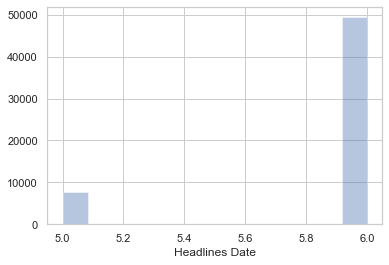

In [138]:
#changing the datatype of Date column
news['Headlines Date'] = pd.to_datetime(news['Headlines Date'], format = '%m/%d/%y', infer_datetime_format=True)
months= news['Headlines Date'].dt.month
sns.distplot(months,kde=False,bins =12)

<AxesSubplot:xlabel='Headlines Date'>

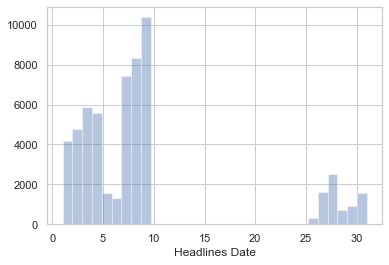

In [139]:
dat= news['Headlines Date'].dt.day
sns.distplot(dat,kde=False,bins =31)

In [140]:
#Extracting tesla related news
news=news[news['Security Symbol']=='TSLA']
news.reset_index(drop=True,inplace=True)
news.head()

,Security Symbol,Security Name,Security Market,Security CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Tags TagValues,Headlines Summary
0,TSLA,Tesla Inc,NASDAQ,MotorVehicles,Elon Musk Lifestyle Debunks Anonymous-Only 2 H...,2021-06-09,NaN,Elon Musk's lifestyle debunks what Anonymous s...
1,TSLA,Tesla Inc,NASDAQ,MotorVehicles,Elon Musk Lifestyle Debunks Anonymous-Only 2 H...,2021-06-09,TSLA,Elon Musk's lifestyle debunks what Anonymous s...
2,TSLA,Tesla Inc,NASDAQ,MotorVehicles,Elon Musk Lifestyle Debunks Anonymous-Only 2 H...,2021-06-09,SPACEX Inc.,Elon Musk's lifestyle debunks what Anonymous s...
3,TSLA,Tesla Inc,NASDAQ,MotorVehicles,Elon Musk Lifestyle Debunks Anonymous-Only 2 H...,2021-06-09,TESLA Inc.,Elon Musk's lifestyle debunks what Anonymous s...
4,TSLA,Tesla Inc,NASDAQ,MotorVehicles,Elon Musk Lifestyle Debunks Anonymous-Only 2 H...,2021-06-09,Tesla Inc.,Elon Musk's lifestyle debunks what Anonymous s...


In [141]:
news.drop(['Security CategoryOrIndustry','Headlines Tags TagValues','Security Name','Headlines Title','Security Market','Security Symbol'],axis=1,inplace=True)
news.rename(columns={'Headlines Date':'Date'},inplace=True)
news.sort_index(axis = 1,inplace=True)

In [142]:
#lets check the number of duplicated rows
news.duplicated().sum()

11116

In [143]:
#lets remove duplicates
news.drop_duplicates(inplace=True, ignore_index=True)

In [144]:
news.isnull().sum()

Date                  0
Headlines Summary    13
dtype: int64

In [145]:
news.dropna(axis=0,inplace=True)

In [146]:
news.rename(columns={'Headlines Summary':'Headlines'},inplace=True)

In [147]:
news

,Date,Headlines
0,2021-06-09,Elon Musk's lifestyle debunks what Anonymous s...
1,2021-06-09,Sahara Rose\r\n\r\n The Dharma Coaching Instit...
2,2021-06-09,"After Allegri, Mourinho and Spalletti, another..."
3,2021-06-09,Income taxes: 37%. Capital gains: 20%. ProPubl...
4,2021-06-09,"A report showing that the richest Americans, i..."
...,...,...
919,2021-05-28,Institutional investors and hedge funds wanted...
920,2021-05-28,My diversified bet on the market's highest-gro...
921,2021-05-28,"Bezos to leave Amazon on July 5, a new Nintend..."
922,2021-05-28,Riot Blockchain Inc. has announced the acquisi...


In [148]:
news['Headlines']=news['Headlines'].str.lower()


In [149]:
news

,Date,Headlines
0,2021-06-09,elon musk's lifestyle debunks what anonymous s...
1,2021-06-09,sahara rose\r\n\r\n the dharma coaching instit...
2,2021-06-09,"after allegri, mourinho and spalletti, another..."
3,2021-06-09,income taxes: 37%. capital gains: 20%. propubl...
4,2021-06-09,"a report showing that the richest americans, i..."
...,...,...
919,2021-05-28,institutional investors and hedge funds wanted...
920,2021-05-28,my diversified bet on the market's highest-gro...
921,2021-05-28,"bezos to leave amazon on july 5, a new nintend..."
922,2021-05-28,riot blockchain inc. has announced the acquisi...


In [150]:
#joining headlines dataframe and news dataframe
headlines_final=pd.concat([headlines,news])

In [151]:
#Joining the rows of the same date and remove the duplicates
headlines_final['Headlines'] = headlines_final.groupby(['Date']).transform(lambda x : ' '.join(x)) 
headlines_final.drop_duplicates(inplace=True, ignore_index=True)
headlines_final['Headlines'].replace("[^a-zA-Z]"," ",regex=True,inplace=True)


In [152]:
headlines_final.head()

,Date,Headlines
0,2015-01-09,expects oil to rebound what jim cramer is tr...
1,2015-01-12,s iphone inutrients the entire usda nation...
2,2015-01-16,s former firm jim chanos bearish on intel cor...
3,2015-01-19,s free ios app of the week marvel pinball ...
4,2015-01-23,s km upscale ev could slam tesla motors i...


In [153]:
#To maintain semantic, replacing "quot","inc" with "and"
headlines_final['Headlines'] = headlines_final['Headlines'].str.replace("quot", "and")
headlines_final['Headlines'] = headlines_final['Headlines'].str.replace("inc", "and")
headlines_final['tokenized'] = headlines_final['Headlines'].apply(word_tokenize)


In [154]:
headlines_final.head()

,Date,Headlines,tokenized
0,2015-01-09,expects oil to rebound what jim cramer is tr...,"[expects, oil, to, rebound, what, jim, cramer,..."
1,2015-01-12,s iphone inutrients the entire usda nation...,"[s, iphone, inutrients, the, entire, usda, nat..."
2,2015-01-16,s former firm jim chanos bearish on intel cor...,"[s, former, firm, jim, chanos, bearish, on, in..."
3,2015-01-19,s free ios app of the week marvel pinball ...,"[s, free, ios, app, of, the, week, marvel, pin..."
4,2015-01-23,s km upscale ev could slam tesla motors a...,"[s, km, upscale, ev, could, slam, tesla, motor..."


In [155]:
#combining all headlines into single word
all_headlines = " ".join(headlines_final['Headlines'])
all_headlines

'  expects oil to rebound what jim cramer is trading  google  suntrust bank and eaton has apple and   aapl  really generated      million jobs in us as it claims  december quarter better than average for apple  cantor fitzgerald apple and  lawsuit about macbook components dismissed what the surge in apple and   aapl  stock represents for investors ubs  more iphones sold in china than us december quarter better than average for apple  cantor fitzgerald blackberry passport review  living with one and having second thoughts apple could launch apple pay in canada as early as march   to mac reports stock market news for january            market news apple recall  gala  granny smith from central california atandt backs blackberry  but curves the square passport phone apple wins dismissal of lawsuit over macbook logic boards apple raises minimum app prices in europe  uk  and canada lawsuit against apple and  over defective logic boards dismissed apple pay grows as it partners with eight new 

In [156]:
#To remove stop words in the list of all_headlines
en_stops = set(stopwords.words('english'))
all_headlines_no_stopwords = ""
for word in all_headlines.split():
    if word not in en_stops:
        all_headlines_no_stopwords += word + " "
all_headlines_no_stopwords

'expects oil rebound jim cramer trading google suntrust bank eaton apple aapl really generated million jobs us claims december quarter better average apple cantor fitzgerald apple lawsuit macbook components dismissed surge apple aapl stock represents investors ubs iphones sold china us december quarter better average apple cantor fitzgerald blackberry passport review living one second thoughts apple could launch apple pay canada early march mac reports stock market news january market news apple recall gala granny smith central california atandt backs blackberry curves square passport phone apple wins dismissal lawsuit macbook logic boards apple raises minimum app prices europe uk canada lawsuit apple defective logic boards dismissed apple pay grows partners eight new credit unions google search engine contract apple coming end apple could bought netflix tesla twitter still spent stock buybacks anyone else app store revenue grew much get digital copy obscurae magazine magzter today get

In [157]:
#lets check top frequency of the word
fdist = FreqDist(all_headlines_no_stopwords.split())
fdist

FreqDist({'apple': 6021, 'tesla': 2285, 'stock': 1304, 'aapl': 1111, 'nasdaq': 731, 'stocks': 703, 'iphone': 663, 'new': 635, 'market': 549, 'tech': 498, ...})

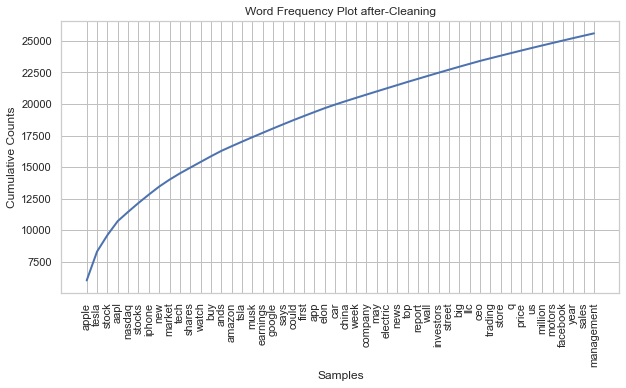

<AxesSubplot:title={'center':'Word Frequency Plot after-Cleaning'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [158]:
plt.figure(figsize=(10, 5))
plt.title("Word Frequency Plot after-Cleaning")
fdist.plot(50,cumulative=True)

In [159]:
from nltk.stem import WordNetLemmatizer


In [160]:
#lets apply it to the each of the row
def rm_stopwords(item):
    #for i in range(len(sentences)):
    #for word in item:    
       # words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in item if word not in set(stopwords.words('english'))]
    sentences = ' '.join(words)  
    return sentences
    
    #cleaned = ""
   # temp = item.split()
    #for word in temp:
     #   if word not in en_stops:
     #       cleaned += word + " "
    #return cleaned

#from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
headlines_final['News_cleaned'] = headlines_final["tokenized"].apply(rm_stopwords)
headlines_final.head()

,Date,Headlines,tokenized,News_cleaned
0,2015-01-09,expects oil to rebound what jim cramer is tr...,"[expects, oil, to, rebound, what, jim, cramer,...",expects oil rebound jim cramer trading google ...
1,2015-01-12,s iphone inutrients the entire usda nation...,"[s, iphone, inutrients, the, entire, usda, nat...",iphone inutrients entire usda national nutrien...
2,2015-01-16,s former firm jim chanos bearish on intel cor...,"[s, former, firm, jim, chanos, bearish, on, in...",former firm jim chanos bearish intel corporati...
3,2015-01-19,s free ios app of the week marvel pinball ...,"[s, free, ios, app, of, the, week, marvel, pin...",free io app week marvel pinball zombie line de...
4,2015-01-23,s km upscale ev could slam tesla motors a...,"[s, km, upscale, ev, could, slam, tesla, motor...",km upscale ev could slam tesla motor china app...


In [161]:
# initialize temporary string
temp = ""
# loop through each headlines in the cleaned headlines
for line in headlines_final['News_cleaned']:
    # append lines to temporary string
    temp += line + " "
# generate word cloud with a max of 100 words using the temporary string
wc = WordCloud(max_words = 100, background_color = 'white').generate(temp)
wc.to_file(r'C:\Users\hemua\Desktop\headlines_corpus_wordcloud.png')

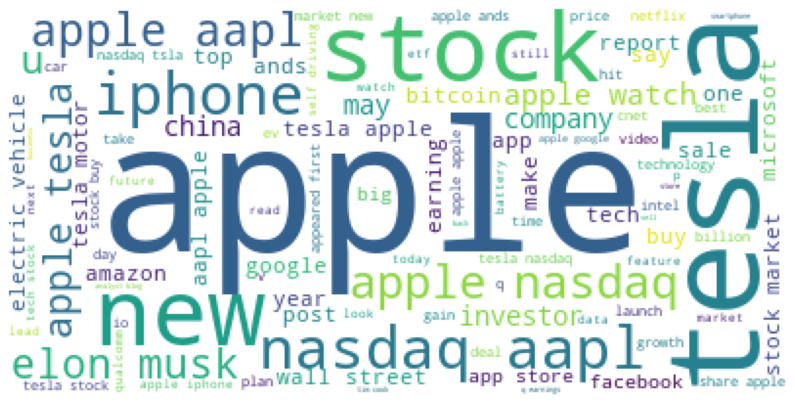

In [162]:
plt.figure(figsize=(14,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [163]:
head_model=pd.DataFrame(headlines_final,columns=['News_cleaned','Date'])

In [164]:
head_model

,News_cleaned,Date
0,expects oil rebound jim cramer trading google ...,2015-01-09
1,iphone inutrients entire usda national nutrien...,2015-01-12
2,former firm jim chanos bearish intel corporati...,2015-01-16
3,free io app week marvel pinball zombie line de...,2015-01-19
4,km upscale ev could slam tesla motor china app...,2015-01-23
...,...,...
887,aim produce eco friendly model short year elec...,2021-06-07
888,tesla say plaid starting price top speed mph g...,2021-06-06
889,sec letter suggested tesla failed another laws...,2021-06-01
890,tesla world largest die cast machine yin yang ...,2021-05-31


In [165]:
head_model = pd.merge(tsla, headlines_final, how='inner', on=['Date'])


In [166]:
head_model=head_model[['Close','News_cleaned']]

In [167]:
head_model['price_change']=head_model['Close'].pct_change()*100

In [168]:
head_model.dropna(axis=0,inplace=True)
head_model.drop(['Close'],axis=1,inplace=True)
head_model['price_change'] =np.where(head_model['price_change']>0,1,0)

In [169]:
from sklearn.feature_extraction.text import CountVectorizer


In [170]:
X=list(head_model['News_cleaned'])
y=list(head_model['price_change'])


In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [172]:
type(x_train)

list

In [173]:
x_train

['tesla downgrade apple stock face money flow apple target hiked ubs ahead iphone event apple make headway movie nflx amzn dis worry thinking buying stock apple facebook fitbit micron tesla bank america reaffirms buy rating apple aapl qualcomm stock alerting bullish trading activity apple aapl sep event preview iphone x watch amazon',
 'expect earnings preview tesla apple facebook expect week apple set beat q earnings estimate tech etf buy apple investor protect earnings loss expectation soar jpmorgan say apple investor protect earnings loss expectation soar jpmorgan say ands app store u x google play sale millennials invest apple amazon tesla apex apple tv subscriber number may disney top analyst upgrade downgrade alphabet amazon apple biogen chewy comcast deere facebook intel solaredge wynn fed meeting preview fed fight coronavirus dow jones fall non iphone segment drive apple',
 'main iphone producer posted first drop sale year apple dominating dow appl simplified tesla model idea a

# Random forest

In [175]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(x_train)

In [176]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [177]:
test_dataset = countvector.transform(x_test)
predictions = randomclassifier.predict(test_dataset)

In [178]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [179]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[32 39]
 [32 42]]
0.5103448275862069
              precision    recall  f1-score   support

           0       0.50      0.45      0.47        71
           1       0.52      0.57      0.54        74

    accuracy                           0.51       145
   macro avg       0.51      0.51      0.51       145
weighted avg       0.51      0.51      0.51       145



# Naive Bayes Classifier

In [180]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(traindataset,y_train)

MultinomialNB()

In [181]:
prediction = naive.predict(test_dataset)

In [182]:
matrix=confusion_matrix(y_test,prediction)
print(matrix)
score=accuracy_score(y_test,prediction)
print(score)
report=classification_report(y_test,prediction)
print(report)

[[28 43]
 [29 45]]
0.503448275862069
              precision    recall  f1-score   support

           0       0.49      0.39      0.44        71
           1       0.51      0.61      0.56        74

    accuracy                           0.50       145
   macro avg       0.50      0.50      0.50       145
weighted avg       0.50      0.50      0.50       145



# SVM Classifier

In [183]:
from sklearn import svm

model = svm.SVC(C=100,kernel='rbf',gamma=0.01)
model.fit(traindataset,y_train)

SVC(C=100, gamma=0.01)

In [184]:
predictions = model.predict(test_dataset)

In [185]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[32 39]
 [33 41]]
0.503448275862069
              precision    recall  f1-score   support

           0       0.49      0.45      0.47        71
           1       0.51      0.55      0.53        74

    accuracy                           0.50       145
   macro avg       0.50      0.50      0.50       145
weighted avg       0.50      0.50      0.50       145



# Building the Hybrid Model

In [186]:
# Now let's join the text data to price data
df = pd.merge(tsla, headlines_final, how='inner', on=['Date'])


In [187]:
df

,Date,Close,Volume,Open,High,Low,day_returns,Trend,Headlines,tokenized,News_cleaned
0,2015-01-09,41.332,22956550,41.784,41.996,40.9920,-1.877834,Negative,expects oil to rebound what jim cramer is tr...,"[expects, oil, to, rebound, what, jim, cramer,...",expects oil rebound jim cramer trading google ...
1,2015-01-12,40.442,29728035,40.610,40.894,39.8500,-2.153295,Negative,s iphone inutrients the entire usda nation...,"[s, iphone, inutrients, the, entire, usda, nat...",iphone inutrients entire usda national nutrien...
2,2015-01-16,38.614,17954275,38.140,38.898,37.9300,0.625423,Negligible or No change,s former firm jim chanos bearish on intel cor...,"[s, former, firm, jim, chanos, bearish, on, in...",former firm jim chanos bearish intel corporati...
3,2015-01-23,40.258,17205260,40.058,40.700,39.6660,-0.163674,Negligible or No change,s km upscale ev could slam tesla motors a...,"[s, km, upscale, ev, could, slam, tesla, motor...",km upscale ev could slam tesla motor china app...
4,2015-02-02,42.188,20719250,40.794,42.390,40.6600,3.605108,Positive,s aapl apple watch pebble sells over a mi...,"[s, aapl, apple, watch, pebble, sells, over, a...",aapl apple watch pebble sell million smartwatc...
...,...,...,...,...,...,...,...,...,...,...,...
719,2021-06-03,572.840,30111890,601.800,604.550,571.2200,-5.334479,Among top losers,s which to get and how to use it how to conne...,"[s, which, to, get, and, how, to, use, it, how...",get use connect apple pencil ipad google let a...
720,2021-06-04,599.050,24036900,579.710,600.610,577.2000,4.575449,Positive,notable friday option activity tsla fb aa...,"[notable, friday, option, activity, tsla, fb, ...",notable friday option activity tsla fb aapl wa...
721,2021-06-07,605.130,22543680,591.825,610.000,582.8800,1.014940,Slight Positive,it aims to produce eco friendly models in...,"[it, aims, to, produce, eco, friendly, models,...",aim produce eco friendly model short year elec...
722,2021-06-08,603.590,26053410,623.010,623.090,595.5000,-0.254491,Negligible or No change,s wwdc so far andluding ios and privacy...,"[s, wwdc, so, far, andluding, ios, and, privac...",wwdc far andluding io privacy top research rep...


In [188]:
df=df[['Close','News_cleaned']]

In [189]:
df['label']=df['Close'].pct_change()*100
df['label']=np.where(df['label']>0,1,0)

In [190]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [191]:
sia = SentimentIntensityAnalyzer()

df['Compound'] = [sia.polarity_scores(v)['compound'] for v in df['News_cleaned']]
#df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
#df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
#df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df

,Close,News_cleaned,label,Compound
0,41.332,expects oil rebound jim cramer trading google ...,0,0.9799
1,40.442,iphone inutrients entire usda national nutrien...,0,0.2960
2,38.614,former firm jim chanos bearish intel corporati...,0,0.7964
3,40.258,km upscale ev could slam tesla motor china app...,1,0.9825
4,42.188,aapl apple watch pebble sell million smartwatc...,1,0.9477
...,...,...,...,...
719,572.840,get use connect apple pencil ipad google let a...,0,0.9995
720,599.050,notable friday option activity tsla fb aapl wa...,1,0.9999
721,605.130,aim produce eco friendly model short year elec...,1,0.9998
722,603.590,wwdc far andluding io privacy top research rep...,0,0.9997


In [192]:
df.drop(['News_cleaned'],axis=1,inplace=True)

In [193]:
df

,Close,label,Compound
0,41.332,0,0.9799
1,40.442,0,0.2960
2,38.614,0,0.7964
3,40.258,1,0.9825
4,42.188,1,0.9477
...,...,...,...
719,572.840,0,0.9995
720,599.050,1,0.9999
721,605.130,1,0.9998
722,603.590,0,0.9997


# LSTM

In [363]:
df_final=df.copy()

In [364]:
df

,Close,label,Compound
0,41.332,0,0.9799
1,40.442,0,0.2960
2,38.614,0,0.7964
3,40.258,1,0.9825
4,42.188,1,0.9477
...,...,...,...
719,572.840,0,0.9995
720,599.050,1,0.9999
721,605.130,1,0.9998
722,603.590,0,0.9997


In [365]:
df_final.drop(['label'],axis=1,inplace=True)

In [366]:
len(df_final)

724

In [367]:
## Creating the dataset

def create_dataset(dataset, scoreset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        b = scoreset[i+look_back-1]
        dataX.append(np.append(a,b))
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [368]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df_final = scaler.fit_transform(df_final)

In [369]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_final = scaler.fit_transform(df_final)

In [370]:
s=pd.DataFrame(df_final)

In [371]:
df_final

array([[0.01317474, 0.9899046 ],
       [0.01213136, 0.64469234],
       [0.00998832, 0.89727929],
       ...,
       [0.67413681, 0.99994952],
       [0.67233141, 0.99989905],
       [0.66669246, 0.99989905]])

In [372]:
train_data, test_data = s[0:int(len(s)*0.75)], s[int(len(s)*0.75):]


In [373]:
len(df_final)

724

In [374]:
train_data_close = train_data[0].values.reshape(-1,1)
test_data_close = test_data[0].values.reshape(-1, 1)
#cv_data_close = scaler.transform(Xcv['Close'].values.reshape(-1,1))

train_data_senti = train_data[0].values.reshape(-1,1)
test_data_senti = test_data[0].values.reshape(-1, 1)
#cv_data_senti = scaler.transform(Xcv['Sentiment'].values.reshape(-1,1))

In [375]:
## Model the data

time_step = 40
Xtrain, ytrain = create_dataset(train_data_close,train_data_senti, time_step)
Xtest, ytest = create_dataset(test_data_close,test_data_senti, time_step)
#Xcv,ycv = create_dataset(cv_data_close,cv_data_senti, time_step)

In [376]:
print(Xtrain.shape), print(ytrain.shape)

(502, 41)
(502,)


(None, None)

In [377]:
# reshape input to be [samples, time steps, features] which is required for LSTM
trainX, trainY = np.array(Xtrain), np.array(ytrain)
trainX = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))

#cvX, cvY = np.array(Xcv), np.array(ycv)
#cvX = np.reshape(Xcv, (Xcv.shape[0], Xcv.shape[1], 1))

testX, testY = np.array(Xtest), np.array(ytest)
testX = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [378]:
### Create the LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [379]:
#Defining our metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [380]:
hybrid_model = Sequential()
hybrid_model.add(LSTM(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26), input_shape = (trainX.shape[1], 1), unroll = True))
hybrid_model.add(Dense(1, name="output_layer"))
hybrid_model.compile(optimizer = Adam(learning_rate=0.001), loss = 'mean_squared_error')

In [381]:
hybrid_model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               66560     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [382]:
hybrid_model.fit(trainX,trainY,validation_data=(testX, testY),epochs=50,batch_size=64,verbose=1)


Epoch 1/50
8/8 [==============================] - 6s 112ms/step - loss: 0.0014 - val_loss: 0.1254
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 4.5487e-04 - val_loss: 0.0279
Epoch 3/50
8/8 [==============================] - 0s 28ms/step - loss: 1.9109e-04 - val_loss: 0.0072
Epoch 4/50
8/8 [==============================] - 0s 25ms/step - loss: 1.7350e-04 - val_loss: 0.0154
Epoch 5/50
8/8 [==============================] - 0s 25ms/step - loss: 1.0771e-04 - val_loss: 0.0025
Epoch 6/50
8/8 [==============================] - 0s 26ms/step - loss: 1.0799e-04 - val_loss: 0.0022
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 9.5212e-05 - val_loss: 0.0030
Epoch 8/50
8/8 [==============================] - 0s 25ms/step - loss: 8.9616e-05 - val_loss: 0.0035
Epoch 9/50
8/8 [==============================] - 0s 26ms/step - loss: 8.7374e-05 - val_loss: 0.0024
Epoch 10/50
8/8 [==============================] - 0s 25ms/step - loss: 7.9639e-05 - val_loss:

In [383]:
### Prediction and check performance metrics
train_predict=hybrid_model.predict(trainX)
test_predict=hybrid_model.predict(testX)

In [384]:
### Transform back to original form
#train_predi=scaler.inverse_transform(train_predict)
prediction_copie = np.repeat(test_predict, df_final.shape[1], axis=-1)

test_predict=scaler.inverse_transform(prediction_copie)[:,0]

In [385]:
test_predict

array([439.81015, 464.22763, 466.3885 , 444.2792 , 432.13144, 427.7925 ,
       427.63046, 425.1135 , 440.2033 , 431.6574 , 436.3107 , 437.97327,
       439.62427, 452.76178, 454.65433, 447.8458 , 444.45465, 439.589  ,
       435.51477, 434.84787, 424.4181 , 429.107  , 429.3223 , 425.37503,
       440.90775, 472.7948 , 498.6263 , 511.62918, 538.0822 , 568.3644 ,
       593.5143 , 612.76685, 611.65857, 617.6562 , 619.6735 , 619.8659 ,
       640.1557 , 653.12836, 637.4155 , 642.8864 , 632.91736, 643.29114,
       637.79236, 675.71277, 670.9137 , 669.41956, 671.07263, 678.5277 ,
       682.2453 , 685.75073, 703.2499 , 718.16364, 740.94086, 757.02527,
       778.3985 , 821.98566, 879.1207 , 873.75543, 896.0001 , 903.1053 ,
       897.23456, 879.105  , 874.25397, 869.1609 , 862.7474 , 878.374  ,
       888.60803, 888.06006, 875.6218 , 847.0156 , 855.31555, 873.0052 ,
       874.486  , 877.87134, 882.8212 , 892.16455, 889.7215 , 864.9835 ,
       854.8264 , 836.53357, 826.4004 , 814.08246, 

In [386]:
#rescaled_ytrain = scaler.inverse_transform(trainY.reshape(-1, 1))
test_copie = np.repeat(testY.reshape(-1, 1), df_final.shape[1], axis=-1)
rescaled_ytest = scaler.inverse_transform(test_copie)[:,0]

In [387]:
rescaled_ytest

array([449.39, 424.23, 380.36, 387.79, 407.34, 421.2 , 419.07, 448.16,
       415.09, 425.68, 425.3 , 425.92, 448.88, 439.67, 421.94, 422.64,
       420.63, 420.28, 424.68, 406.02, 423.9 , 420.98, 410.36, 441.61,
       486.64, 499.27, 489.61, 521.85, 555.38, 574.  , 585.76, 567.6 ,
       584.76, 593.38, 599.04, 641.76, 649.88, 604.48, 627.07, 609.99,
       639.83, 622.77, 695.  , 649.86, 640.34, 645.98, 661.77, 663.69,
       665.99, 694.78, 705.67, 729.77, 735.11, 755.98, 816.04, 880.02,
       811.19, 849.44, 854.41, 845.  , 826.16, 844.55, 850.45, 846.64,
       880.8 , 883.09, 864.16, 835.43, 793.53, 839.81, 872.79, 854.69,
       849.99, 852.23, 863.42, 849.46, 804.82, 811.66, 796.22, 798.15,
       787.38, 781.3 , 714.5 , 698.84, 742.02, 675.5 , 718.43, 686.44,
       653.2 , 597.95, 673.58, 668.06, 699.6 , 676.88, 701.81, 654.87,
       670.  , 662.16, 630.27, 640.39, 618.71, 611.29, 635.62, 667.93,
       661.75, 691.05, 691.62, 670.97, 701.98, 762.32, 732.23, 738.85,
      

In [388]:
# report performance
from sklearn import metrics

mse = metrics.mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = metrics.mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = np.sqrt(metrics.mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))

MSE: 1478.2006203668243
MAE: 31.173057547433032
RMSE: 38.44737468757554


In [327]:
# report performance
from sklearn import metrics

mse = metrics.mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = metrics.mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = np.sqrt(metrics.mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
#mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
#print('MAPE: '+str(mape))

MSE: 1080.6315520500252
MAE: 26.55234714181082
RMSE: 32.8729608044366


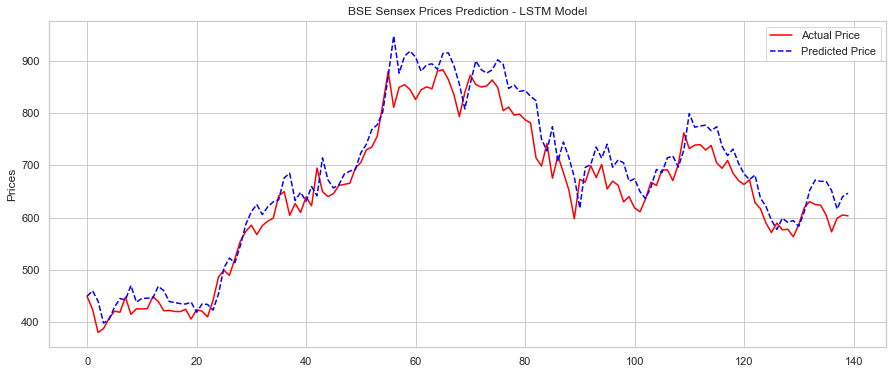

In [299]:
plt.figure(figsize=(15,6))
plt.plot(rescaled_ytest,color='red', label='Actual Price')
plt.plot(test_predict, color='blue', linestyle='dashed',label='Predicted Price')
plt.title('BSE Sensex Prices Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()